# Assignment 1
This file covers the solutions to the 4 questions on assignment 1.
1. Generate samples using a given covariance matrix.
2. Create decision boundaries giving class priors.
3. Implement the PCA dimensionality reduction technqiue.
4. Implement the kNN classifier.

In [1]:
# Import Packages
import numpy as np
import scipy.linalg as sl
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.metrics import confusion_matrix
from mlxtend.data import loadlocal_mnist

## Question 1 - Covariance Matrix A

In [13]:
n = 1000
d = 2

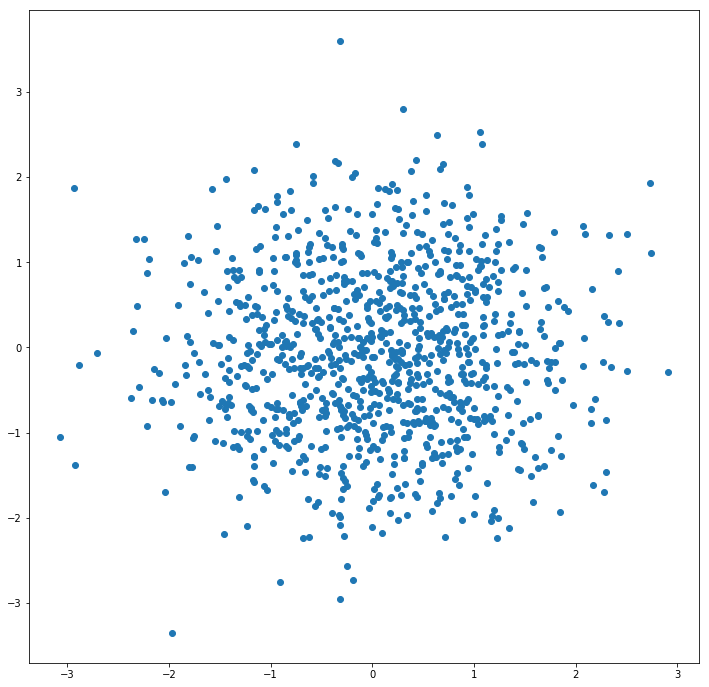

In [14]:
# part a
covariance = np.array([[1, 0],[0, 1]])
np.random.seed(2048)
Y = np.random.randn(n, d)
chol_cov = np.linalg.cholesky(covariance)
Y = np.matmul(Y, chol_cov)

fig = plt.figure(figsize=(12,12))
plt.scatter(Y[:,0], Y[:,1])
plt.show()

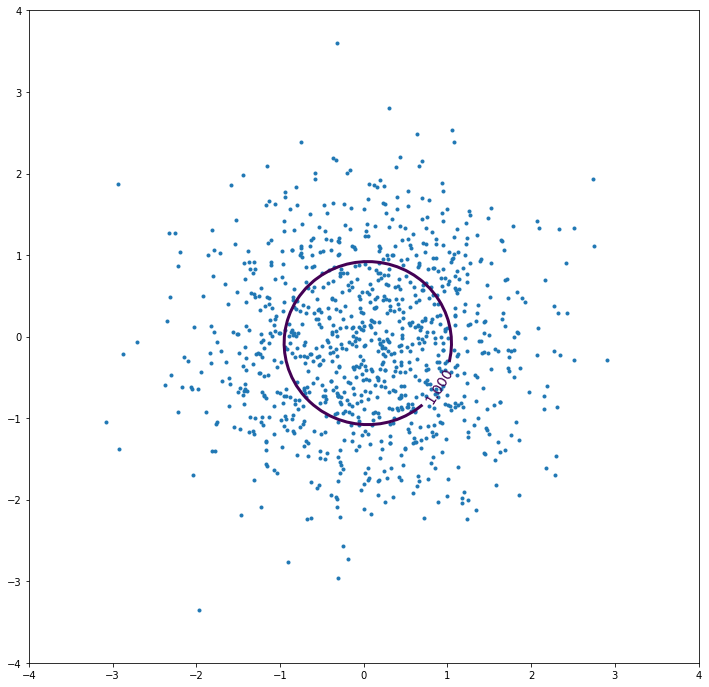

In [15]:
# part b

# calculate mean, eigenvalues, eigenvectors and transform matrix
mean0 = np.mean(Y[:,0])
mean1 = np.mean(Y[:,1])
eig_vals, eig_vecs = np.linalg.eig(covariance)
A = np.linalg.inv(covariance)

# circle centered at mean of data
xv = np.arange(-4, 4, 0.1)
yv = np.arange(-4, 4, 0.1)
x, y = np.meshgrid(xv, yv)
z = (x - mean0) ** 2 + (y - mean1) ** 2

# transform given point (x, y) using matrix A
def transform(x, y, A):
    data = np.array([x, y])
    z = np.sqrt(np.absolute(np.matmul(data.T, np.matmul(A, data)))) # sqrt([x, y]*A*[x, y].T)
    return np.diag(z)

# manipulate circle to obtain standard deviation contour
gridsize = len(x)
zt = np.empty((gridsize, gridsize))
for i in range(gridsize):
    zt[i] = transform(x[i] - mean0, y[i] - mean1, A)

# from part a
fig, ax = plt.subplots(figsize=(12,12))
plt.scatter(Y[:,0], Y[:,1], marker='.')

# plot contour
cs = ax.contour(x, y, zt, levels=[1], linewidths=3)
ax.clabel(cs, inline=1, fontsize=14)

# plot formatting
xmin, ymin = -4, -4
xmax, ymax = 4, 4
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

In [16]:
# part c and d

# calculate sample covariance
mu = [mean0, mean1]
zero_mean_Y = Y - mu
sample_cov = np.matmul(zero_mean_Y.T, zero_mean_Y) / (Y.shape[0] - 1)
print('Sample Covariance:')
print(sample_cov)

print('\nCovariance Matrix:')
print(covariance)

print('\nDifference:')
print(covariance - sample_cov)

Sample Covariance:
[[0.9899551  0.02335461]
 [0.02335461 0.96827143]]

Covariance Matrix:
[[1 0]
 [0 1]]

Difference:
[[ 0.0100449  -0.02335461]
 [-0.02335461  0.03172857]]


## Question 1 - Covariance Matrix B

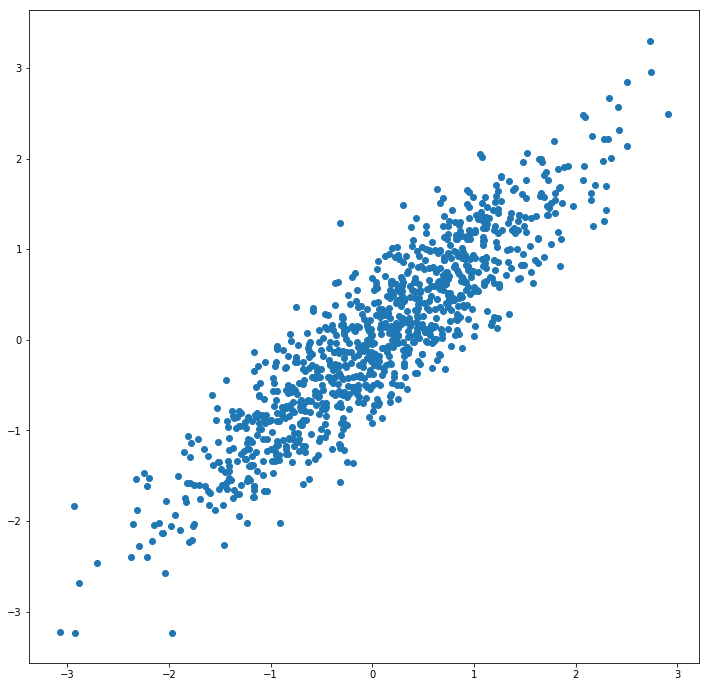

In [17]:
# part a
covariance = np.array([[1, 0.9],[0.9, 1]])
np.random.seed(2048)
Y = np.random.randn(n, d)
chol_cov = np.linalg.cholesky(covariance)
Y = np.matmul(Y, chol_cov.T)

fig = plt.figure(figsize=(12,12))
plt.scatter(Y[:,0], Y[:,1])
plt.show()

C:\Anaconda3\envs\syde675-asgmt\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in sqrt


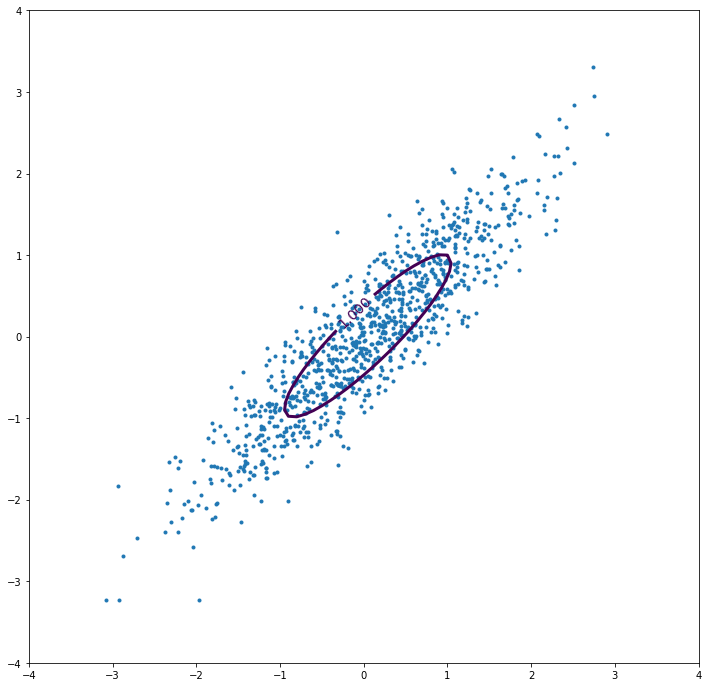

In [18]:
# part b

# calculate mean, eigenvalues, eigenvectors and transform matrix
mean0 = np.mean(Y[:,0])
mean1 = np.mean(Y[:,1])
eig_vals, eig_vecs = np.linalg.eig(covariance)
A = np.linalg.inv(covariance)

# circle centered at mean of data
xv = np.arange(-4, 4, 0.1)
yv = np.arange(-4, 4, 0.1)
x, y = np.meshgrid(xv, yv)
z = (x - mean0) ** 2 + (y - mean1) ** 2

# transform given point (x, y) using matrix A
def transform(x, y, A):
    data = np.array([x, y])
    z = np.sqrt(np.matmul(data.T, np.matmul(A, data))) # sqrt([x, y]*A*[x, y].T)
    return np.diag(z)

# manipulate circle to obtain standard deviation contour
gridsize = len(x)
zt = np.empty((gridsize, gridsize))
for i in range(gridsize):
    zt[i] = transform(x[i] - mean0, y[i] - mean1, A)

# from part a
fig, ax = plt.subplots(figsize=(12,12))
plt.scatter(Y[:,0], Y[:,1], marker='.')

# plot contour
cs = ax.contour(x, y, zt, levels=[1], linewidths=3)
ax.clabel(cs, inline=1, fontsize=14)

# plot formatting
xmin, ymin = -4, -4
xmax, ymax = 4, 4
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

In [19]:
# part c and d

# calculate sample covariance
mu = [mean0, mean1]
zero_mean_Y = Y - mu
sample_cov = np.matmul(zero_mean_Y.T, zero_mean_Y) / (Y.shape[0] - 1)
print('Sample Covariance:')
print(sample_cov)

print('\nCovariance Matrix:')
print(covariance)

print('\nDifference:')
print(covariance - sample_cov)

Sample Covariance:
[[0.9899551  0.90113963]
 [0.90113963 1.00415927]]

Covariance Matrix:
[[1.  0.9]
 [0.9 1. ]]

Difference:
[[ 0.0100449  -0.00113963]
 [-0.00113963 -0.00415927]]


# Question 2

In [20]:
# given parameters
prob_c1 = 0.2
prob_c2 = 0.3
prob_c3 = 0.5
mu_1 = [3, 2]
mu_2 = [5, 4]
mu_3 = [2, 5]
cov_1 = [[1, -1], [-1, 2]]
cov_2 = [[1, -1], [-1, 7]]
cov_3 = [[0.5, 0.5], [0.5, 3]]

In [111]:
# part a

# transform given point (x, y) using matrix A
def transform(x, y, A):
    data = np.array([x, y])
    z = np.sqrt(np.absolute(np.matmul(data.T, np.matmul(A, data)))) # sqrt([x, y]*A*[x, y].T)
    return np.diag(z) if not isinstance(z, float) else z

def multiDimGaussian(data, mu, cov):
    numerator = -0.5 * transform(data[0] - mu[0], data[1] - mu[1], np.linalg.inv(cov))
    denominator = np.sqrt(np.absolute((2*np.pi)**2 * np.linalg.det(cov)))
    return np.exp(numerator) / denominator

# compute first standard deviation contour based on mean and cov
def stdContour(mu, cov, x, y):
    # mean and covariance
    mean0 = mu[0]
    mean1 = mu[1]
    A = np.linalg.inv(cov)

    # manipulate circle to obtain standard deviation contour
    gridsize = len(x)
    zt = np.empty((gridsize, gridsize))
    for i in range(gridsize):
        zt[i] = transform(x[i] - mean0, y[i] - mean1, A)
    
    return zt

# label points to identify the ML decision boundaries
def mlDecisionBoundaries(mus, covs, x, y):
    gridsize = len(x)
    db = np.empty((gridsize, gridsize))
    for i in range(gridsize):
        for j in range(gridsize):
            data = [x[i][j], y[i][j]]
            res = [multiDimGaussian(data, mus[0], covs[0]),
                  multiDimGaussian(data, mus[1], covs[1]),
                  multiDimGaussian(data, mus[2], covs[2])]
            db[i][j] = res.index(max(res)) + 1
    return db

# label points to identify the MAP decision boundaries
def mapDecisionBoundaries(mus, covs, probs, x, y):
    gridsize = len(x)
    db = np.empty((gridsize, gridsize))
    for i in range(gridsize):
        for j in range(gridsize):
            data = [x[i][j], y[i][j]]
            res = [np.log(multiDimGaussian(data, mus[0], covs[0])) + np.log(probs[0]),
                  np.log(multiDimGaussian(data, mus[1], covs[1])) + np.log(probs[1]),
                  np.log(multiDimGaussian(data, mus[2], covs[2])) + np.log(probs[2])]
            db[i][j] = res.index(max(res)) + 1
    return db


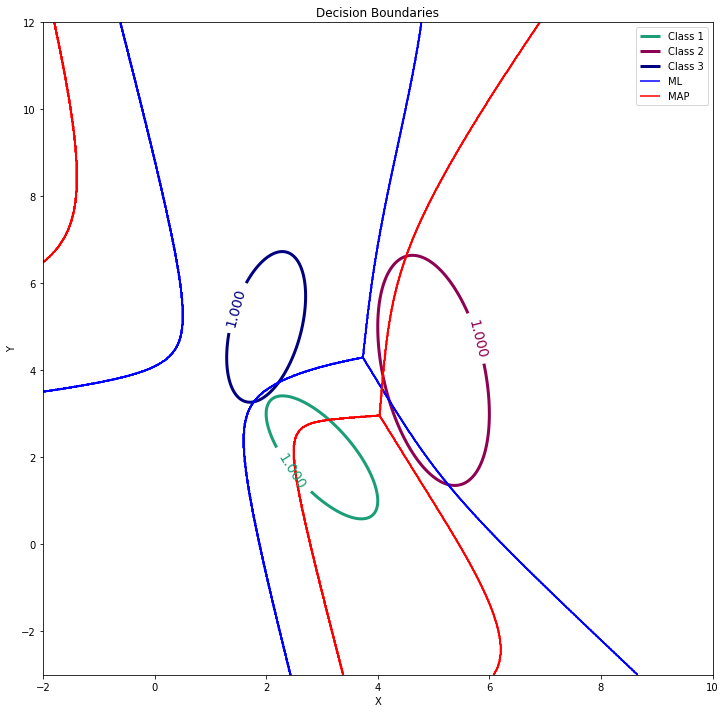

Wall time: 9min 16s


In [148]:
%%time
# setup plot grid
xv = np.arange(-3, 12, 0.01)
yv = np.arange(-3, 12, 0.01)
x, y = np.meshgrid(xv, yv)

# create plot
fig, ax = plt.subplots(figsize=(12,12))

mus = [mu_1, mu_2, mu_3]
covs = [cov_1, cov_2, cov_3]
probs = [prob_c1, prob_c2, prob_c3]

# plot contour for each class
zts = []
legenditems = []
c = iter(['Dark2', 'PiYG', 'jet'])
for mu, cov in zip(mus, covs):
    color = next(c)
    zt = stdContour(mu, cov, x, y)
    zts.append(zt)
    cs = ax.contour(x, y, zt, levels=[1], linewidths=3, cmap=color)
    ax.clabel(cs, inline=1, fontsize=14)
    h1,_ = cs.legend_elements()
    legenditems.append(h1)

# plot ML decision boundaries
ml_db = mlDecisionBoundaries(mus, covs, x, y)
ml_dbc = ax.contour(x, y, ml_db, colors='b')

# plot MAP decision boundaries
map_db = mapDecisionBoundaries(mus, covs, probs, x, y)
map_dbc = ax.contour(x, y, map_db, colors='r')

# contour legend labels
h1,_ = ml_dbc.legend_elements()
h2,_ = map_dbc.legend_elements()
ax.legend([legenditems[0][0], legenditems[1][0], legenditems[2][0], h1[0], h2[0]], ['Class 1', 'Class 2', 'Class 3', 'ML', 'MAP'])

# plot formatting
xmin, ymin = -2, -3
xmax, ymax = 10, 12
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Decision Boundaries')
plt.show()

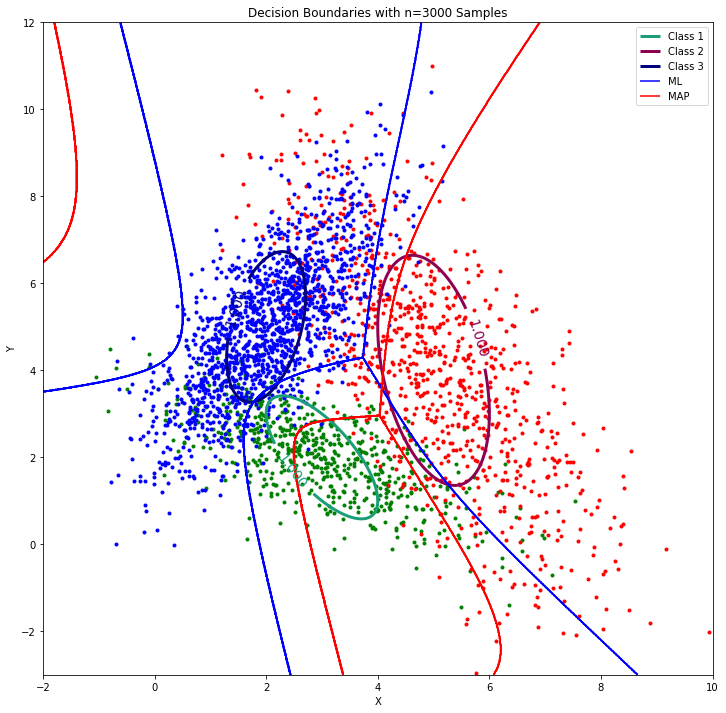

Wall time: 981 ms


In [149]:
%%time
## part b
n = 3000
d = 2
n_c1 = int(n * prob_c1)
n_c2 = int(n * prob_c2)
n_c3 = int(n * prob_c3)
ns = [n_c1, n_c2, n_c3]

np.random.seed(1024)
Ys = []

for mu, cov, n_c in zip(mus, covs, ns):
    Y_c = np.random.randn(n_c, d)
    chol_cov = np.linalg.cholesky(cov)
    Y_c = np.matmul(Y_c, chol_cov) + mu
    Ys.append(Y_c)

# plot the points
fig, ax = plt.subplots(figsize=(12,12))
colors = iter(['g', 'r', 'b'])
for Y in Ys:
    c = next(colors)
    plt.scatter(Y[:,0], Y[:,1], color=c, marker='.')
    
# plot contour for each class
legenditems = []
c = iter(['Dark2', 'PiYG', 'jet'])
for zt in zts:
    color = next(c)
    cs = ax.contour(x, y, zt, levels=[1], linewidths=3, cmap=color)
    ax.clabel(cs, inline=1, fontsize=14)
    h1,_ = cs.legend_elements()
    legenditems.append(h1)
    
# plot ML decision boundaries
ml_dbc = ax.contour(x, y, ml_db, colors='b')

# plot MAP decision boundaries
map_dbc = ax.contour(x, y, map_db, colors='r')

# contour legend labels
h1,_ = ml_dbc.legend_elements()
h2,_ = map_dbc.legend_elements()
ax.legend([legenditems[0][0], legenditems[1][0], legenditems[2][0], h1[0], h2[0]], ['Class 1', 'Class 2', 'Class 3', 'ML', 'MAP'])
    
# plot formatting
xmin, ymin = -2, -3
xmax, ymax = 10, 12
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Decision Boundaries with n=3000 Samples')
plt.show()

In [182]:
# calculate p(error) for 3 class confusion matrix
def computeProbError(conf_mtx, prob_c1, prob_c2, prob_c3):
    p_error = ((conf_mtx[1, 0] + conf_mtx[2, 0]) / sum(conf_mtx[:, 0])) * prob_c1 + \
            ((conf_mtx[0, 1] + conf_mtx[2, 1]) / sum(conf_mtx[:, 1])) * prob_c2 + \
            ((conf_mtx[0, 2] + conf_mtx[1, 2]) / sum(conf_mtx[:, 2])) * prob_c3
    return p_error

# calculate confusion matrix
labels = [1, 2, 3]
y_true = []
y_pred_ml = []
y_pred_map = []


for Y, label in zip(Ys, labels):
    for data in Y:
        y_true.append(label)
        y_pred_ml.append(int(mlDecisionBoundaries(mus, covs, [[data[0]]], [[data[1]]])[0][0]))
        y_pred_map.append(int(mapDecisionBoundaries(mus, covs, probs, [[data[0]]], [[data[1]]])[0][0]))
        
conf_mtx_ml = confusion_matrix(y_true, y_pred_ml)
conf_mtx_map = confusion_matrix(y_true, y_pred_map)

print('Confusion Matrix for ML:')
print(conf_mtx_ml)
print('\nP(ε) for ML:')
print(computeProbError(conf_mtx_ml, prob_c1, prob_c2, prob_c3))

print('\n\nConfusion Matrix for MAP:')
print(conf_mtx_map)
print('\nP(ε) for MAP:')
print(computeProbError(conf_mtx_map, prob_c1, prob_c2, prob_c3))


Confusion Matrix for ML:
[[ 480   20  100]
 [ 115  595  190]
 [  71   29 1400]]

P(ε) for ML:
0.16448075938042492


Confusion Matrix for MAP:
[[ 288   53  259]
 [  35  582  283]
 [   2    4 1494]]

P(ε) for MAP:
0.18263391988625116


# Question 3

In [2]:
# load dataset


In [ ]:
# part a